In [146]:
#dependencies
import requests
import json
import datetime
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [149]:
data = 'weather_by_month'
weather_data_df = pd.read_csv(data)
weather_data_df
weather_data_df['Month'] = weather_data_df['Month'].map(lambda x: int(x[-2:]))
weather_data_df.head()


,Unnamed: 0,Month,Temperature (F),Humitdity (%),Snowfall Depth (in),Wind Speed (MPH),Precipitation (in)
0,0,2,30.2,44.1,0.0,11.0,0.00
1,1,3,34.1,47.2,0.0,7.3,0.00
2,2,3,47.8,56.0,0.0,6.7,0.00
3,3,3,52.0,79.9,0.0,6.2,0.23
4,4,3,49.9,50.3,0.0,12.4,0.00


In [150]:
seasons = [[12,1,2],[3,4,5],[6,7,8],[9,10,11]]
measurements = list(weather_data_df.drop(columns=['Unnamed: 0','Month']).keys())

In [151]:
measurements

['Temperature (F)',
 'Humitdity (%)',
 'Snowfall Depth (in)',
 'Wind Speed (MPH)',
 'Precipitation (in)']

In [152]:
def box_data(column):
    seasonal_temps = []

    for season in seasons:

    # season = seasons[0]
        season_df = weather_data_df.loc[
            (weather_data_df['Month']==season[0])|
            (weather_data_df['Month']==season[1])|
            (weather_data_df['Month']==season[2])
        ]

        seasonal_temps.append(season_df[column])

    return seasonal_temps

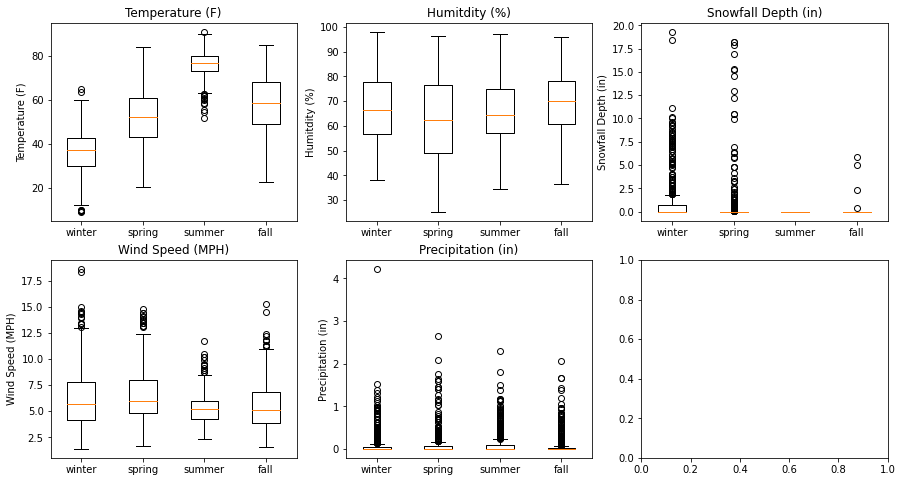

In [153]:
m = 0
fig, ax = plt.subplots(2,3,figsize=(15,8))

for row in ax:
    for col in row:
        try:
            measurement = measurements[m]
            title=measurement
            unit=measurement
            col.set_title(title)
            col.set_ylabel(unit)
            col.boxplot(box_data(measurement),labels=['winter','spring','summer','fall'])
            m += 1
        except:IndexError
plt.show()
        

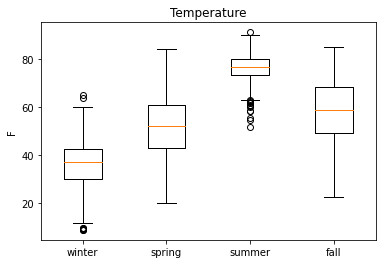

The lower quartile of temperature is: 41.3
The upper quartile of temperature is: 72.27499999999999
The interquartile range of temperature is: 30.974999999999994
The the median of temperature is: 54.7 
Values below -5.162499999999994 could be outliers.
Values above 118.73749999999998 could be outliers.


In [154]:
fig2, ax2 = plt.subplots()
ax2.set_title('Temperature')
ax2.set_ylabel('F')
ax2.boxplot(box_data('Temperature (F)'),labels=['winter','spring','summer','fall'])
plt.show()

temperature = (weather_data_df['Temperature (F)'])
quartiles = temperature.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of temperature is: {lowerq}")
print(f"The upper quartile of temperature is: {upperq}")
print(f"The interquartile range of temperature is: {iqr}")
print(f"The the median of temperature is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

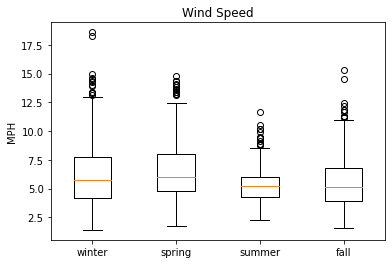

The lower quartile of Wind Speed is: 4.3
The upper quartile of Wind Speed is: 7.1
The interquartile range of Wind Speed is: 2.8
The the median of Wind Speed is: 5.5 
Values below 0.10000000000000053 could be outliers.
Values above 11.299999999999999 could be outliers.


In [155]:
fig2, ax2 = plt.subplots()
ax2.set_title('Wind Speed')
ax2.set_ylabel('MPH')
ax2.boxplot(box_data('Wind Speed (MPH)'),labels=['winter','spring','summer','fall'])
plt.show()

wind_speed = (weather_data_df['Wind Speed (MPH)'])
quartiles = wind_speed.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Wind Speed is: {lowerq}")
print(f"The upper quartile of Wind Speed is: {upperq}")
print(f"The interquartile range of Wind Speed is: {iqr}")
print(f"The the median of Wind Speed is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

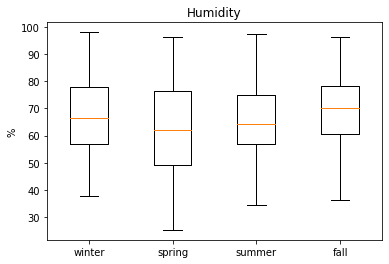

The lower quartile of humidity is: 56.2
The upper quartile of humidity is: 76.9
The interquartile range of humidity is: 20.700000000000003
The the median of humidity is: 65.65 
Values below 25.15 could be outliers.
Values above 107.95000000000002 could be outliers.


In [156]:
fig2, ax2 = plt.subplots()
ax2.set_title('Humidity')
ax2.set_ylabel('%')
ax2.boxplot(box_data('Humitdity (%)'),labels=['winter','spring','summer','fall'])
plt.show()

humidity = (weather_data_df['Humitdity (%)'])
quartiles = humidity.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of humidity is: {lowerq}")
print(f"The upper quartile of humidity is: {upperq}")
print(f"The interquartile range of humidity is: {iqr}")
print(f"The the median of humidity is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

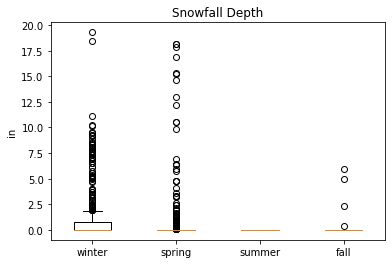

The lower quartile of snowfall is: 0.0
The upper quartile of snowfall is: 0.0
The interquartile range of snowfall is: 0.0
The the median of snowfall is: 0.0 
Values below 0.0 could be outliers.
Values above 0.0 could be outliers.


In [157]:
fig2, ax2 = plt.subplots()
ax2.set_title('Snowfall Depth')
ax2.set_ylabel('in')
ax2.boxplot(box_data('Snowfall Depth (in)'),labels=['winter','spring','summer','fall'])
plt.show()

snowfall = (weather_data_df['Snowfall Depth (in)'])
quartiles = snowfall.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of snowfall is: {lowerq}")
print(f"The upper quartile of snowfall is: {upperq}")
print(f"The interquartile range of snowfall is: {iqr}")
print(f"The the median of snowfall is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

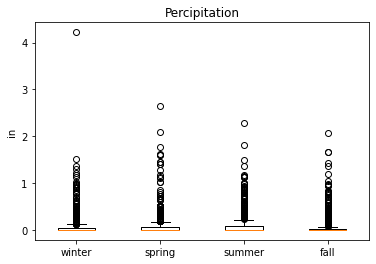

The lower quartile of percipitation is: 0.0
The upper quartile of percipitation is: 0.06
The interquartile range of percipitation is: 0.06
The the median of percipitation is: 0.0 
Values below -0.09 could be outliers.
Values above 0.15 could be outliers.


In [158]:
fig2, ax2 = plt.subplots()
ax2.set_title('Percipitation')
ax2.set_ylabel('in')
ax2.boxplot(box_data('Precipitation (in)'),labels=['winter','spring','summer','fall'])
plt.show()

percpitation = (weather_data_df['Precipitation (in)'])
quartiles = percpitation.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of percipitation is: {lowerq}")
print(f"The upper quartile of percipitation is: {upperq}")
print(f"The interquartile range of percipitation is: {iqr}")
print(f"The the median of percipitation is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")